In [9]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from scipy.stats import ttest_ind  
from statsmodels.stats.proportion import proportions_ztest  
import statsmodels.api  as     sm
from   statsmodels.formula.api import ols

# Part A

# 1.A. Refer above table and find the joint probability of the people who planned to purchase and actually placed an order

In [15]:
E1 = 500/2000 #people who planned to purchase
E2 = 400/500  #people who actually purchased
Joint_probability = (E1*E2)*100 # P(A and B) = P(A).P(B)
print('joint probability is',Joint_probability,'%')

joint probability is 20.0 %


# 1.B. Refer to the above table and find the joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchase

In [14]:
x = 400/2000 #P(Actually Purchased | Planned to Purchase)
y = 500/2000 #Planned to Purchase
z = x/y*100  
print('joint probability is',z,'%')

joint probability is 80.0 %


# 2. An electrical manufacturing company conducts quality checks at specified periods on the products it manufactures. Historically, the failure rate for the manufactured item is 5%. Suppose a random sample of 10 manufactured items is selected. Answer the following questions



In [17]:
n=10 #number of samples
p=0.05 #given probability

t=np.arange(0,11) 
t

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [18]:
binomial = stats.binom.pmf(t,n,p)
binomial

array([5.98736939e-01, 3.15124705e-01, 7.46347985e-02, 1.04750594e-02,
       9.64808106e-04, 6.09352488e-05, 2.67259863e-06, 8.03789062e-08,
       1.58642578e-09, 1.85546875e-11, 9.76562500e-14])

In [19]:
#2.A.Probability that none of the items are defective?
stats.binom.pmf(0,n,p)*100

print('Probability that none of the items are defective is',stats.binom.pmf(0,n,p)*100,'%')

Probability that none of the items are defective is 59.87369392383787 %


In [20]:
#2.B.Probability that exactly one of the items is defective?
stats.binom.pmf(1,n,p)*100
print('Probability that exactly one of the items is defective',stats.binom.pmf(1,n,p)*100,'%')

Probability that exactly one of the items is defective 31.51247048623047 %


In [21]:
#2.C.Probability that two or fewer of the items are defective?
stats.binom.cdf(2,n,p) #using cumulative distribution fuction
print('Probability that two or fewer of the items are defective is',stats.binom.cdf(2,n,p)*100,'%')

Probability that two or fewer of the items are defective is 98.84964426207031 %


In [22]:
#2.D.Probability that three or more of the items are defective?
1-stats.binom.cdf(2,n,p)
Prob_of_3_or_more = (1-stats.binom.cdf(2,n,p))*100
print('Probability that three or more of the items are defective is',Prob_of_3_or_more,'%')

Probability that three or more of the items are defective is 1.150355737929687 %


# 3. A car salesman sells on an average 3 cars per week.

In [23]:
#3.A. What is Probability that in a given week he will sell some cars?
rate = 3
prob_of_selling_0 = stats.poisson.pmf(0,3)
prob_of_selling_some = (1-prob_of_selling_0)*100
print('Probability that in a given week he will sell some cars',prob_of_selling_some,'%')

Probability that in a given week he will sell some cars 95.0212931632136 %


In [24]:
#3.B. What is Probability that in a given week he will sell 2 or more but less than 5 cars?
prob_of_more_than_2_and_less_than_5 = (stats.poisson.cdf(4,3)-stats.poisson.cdf(1,3))*100
print('Probability that in a given week he will sell 2 or more but less than 5 cars',prob_of_more_than_2_and_less_than_5,'%')

Probability that in a given week he will sell 2 or more but less than 5 cars 61.611497105231635 %


In [28]:
#3.C. Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold per week.
sp=np.arange(0,4)
poisson = stats.poisson.cdf(sp,3)
poisson

array([0.04978707, 0.19914827, 0.42319008, 0.64723189])

In [26]:
poisson*100

array([ 4.97870684, 19.91482735, 42.31900811, 64.72318888])

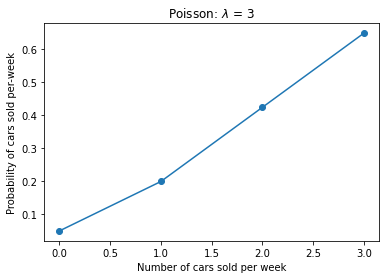

In [29]:
plt.plot(sp,poisson,'o-')
plt.title('Poisson: $\lambda$ = %i ' % rate)
plt.xlabel('Number of cars sold per week')
plt.ylabel('Probability of cars sold per-week')
plt.show()

# 4. Accuracy in understanding orders for a speech based bot at a restaurant is important for the Company X which has designed,marketed and launched the product for a contactless delivery due to the COVID-19 pandemic. Recognition accuracy that measures the percentage of orders that are taken correctly is 86.8%. Suppose that you place an order with the bot and two friends of yours independently place orders with the same bot. Answer the following questions.




In [30]:
sample_size = 3
Percentage_of_orders = 0.868

K = np.arange(0,5)
K


array([0, 1, 2, 3, 4])

In [31]:
#4.A.What is the probability that all three orders will be recognised correctly?

binomial1 = stats.binom.pmf(1,3,0.868) + stats.binom.pmf(2,3,0.868) + stats.binom.pmf(3,3,0.868)

print('The probability that all three orders will be recognised correctly is',binomial1*100,'%')

The probability that all three orders will be recognised correctly is 99.7700032 %


In [32]:
#4.B.What is the probability that none of the three orders will be recognised correctly?

binomial2 = stats.binom.pmf(0,3,0.868)

print('The probability that none of the three orders will be recognised correctly is',binomial2*100,"%")

The probability that none of the three orders will be recognised correctly is 0.22999680000000003 %


In [33]:
#4.C.What is the probability that at least two of the three orders will be recognised correctly?

binomial3 = stats.binom.pmf(1,3,0.868) + stats.binom.pmf(2,3,0.868)

rint('The probability that at least two of the three orders will be recognised correctly is',binomial3*100,'%')

The probability that at least two of the three orders will be recognised correctly is 34.372800000000005 %


# 5. Real life industry scenario - Online travel company Goibibo has a chatbot to handle customer queries. As per past records, the chatbot provides accurate resolutions to customer queries in 78.5% of cases.Based on a sample of 10 random chats.

In [34]:
sample_chats = 10
Success_rate = 0.785

number_of_chats = np.arange(0,11)
number_of_chats

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [44]:
#1.accurate resolutions to customer queries not provided in any of the chats
binomial4=stats.binom.pmf(0,10,0.780)*100
print('accurate resolutions to customer queries not provided in any of the chats',binomial4,'%')

accurate resolutions to customer queries not provided in any of the chats 2.6559922791423967e-05 %


In [45]:
#2.accurate resolutions to customer queries are provided in all 10 chats

binomial6=(stats.binom.pmf(1,10,0.78)+stats.binom.pmf(2,10,0.78)+stats.binom.pmf(3,10,0.78)+stats.binom.pmf(4,10,0.78)+stats.binom.pmf(5,10,0.78)+stats.binom.pmf(6,10,0.78)+stats.binom.pmf(7,10,0.78)+stats.binom.pmf(8,10,0.78)+stats.binom.pmf(9,10,0.78)+stats.binom.pmf(10,10,0.78))*100
print('accurate resolutions to customer queries are provided in all 10 chats is',binomial6,'%')

accurate resolutions to customer queries are provided in all 10 chats is 99.99997344007721 %


In [70]:
#3.accurate resolutions to customer queries is provided for at least 5 chats

binomial6= stats.binom.pmf(1,10,0.78) + stats.binom.pmf(2,10,0.78) + stats.binom.pmf(3,10,0.78)+ stats.binom.pmf(4,10,0.78)+ stats.binom.pmf(5,5,0.80)
print('accurate resolutions to customer queries is provided for at least 3 chats is',binomial6*100,'%')   

accurate resolutions to customer queries is provided for at least 3 chats is 33.80733022370778 %


# Part B

# Company X manages the men's top professional basketball division of the American league system. The dataset contains informationon all the teams that have participated in all the past tournaments. It has data about how many baskets each team scored, conceded, how many times they came within the first 2 positions, how many tournaments they have qualified, their best position in the past, etc

In [78]:
#Read the dataset
data= pd.read_csv("C:\\Users\\DELL\\Downloads\\Basketball.csv")


In [80]:
data.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [82]:
#1.Check for null values
data.isna().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

In [85]:
#2. check data information,count and data type etc
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [86]:
#3.Check for duplicates
duplicates = data.duplicated()
sum(duplicates)

0

In [87]:
data.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15
60,Team 61,1,-,-,-,-,-,-,-,-,-,2017~18,9


In [91]:
#CHeck unique values count
print("TournamentChampion",data['TournamentChampion'].unique())

TournamentChampion ['33' '25' '10' '6' '8' '1' '-' '2']


In [93]:
print("Runner-up",data['Runner-up'].unique())

Runner-up ['23' '25' '8' '6' '7' '4' '-' '3' '1' '5']


In [94]:
print("Score",data['Score'].unique())

Score ['4385' '4262' '3442' '3386' '3368' '2819' '2792' '2573' '2109' '1884'
 '1814' '1789' '1471' '1416' '1389' '1351' '1314' '1174' '1148' '1020'
 '970' '667' '662' '606' '553' '538' '510' '445' '421' '416' '375' '353'
 '343' '293' '285' '277' '242' '230' '190' '188' '168' '150' '148' '132'
 '107' '96' '91' '83' '81' '76' '71' '56' '52' '42' '40' '35' '34' '22'
 '19' '14' '-']


In [95]:
#Renames team column by reaplcing team with T to avoid null values in the further methods/visualization
data['Team']=data['Team'].str.replace('Team ','T');
columns = data.columns.drop('Team');

#Datatypes are object hence change them to integers to get further insights around the data
data[columns] = data[columns].apply(pd.to_numeric, errors='coerce')


In [96]:
data=data.replace('-',0); #Replacing - with 0 to have similar values in dataset.

In [97]:
data.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
56,T57,1,34.0,38.0,8.0,10.0,20.0,38.0,66.0,NaN,NaN,NaN,20
57,T58,1,22.0,30.0,7.0,8.0,15.0,37.0,57.0,NaN,NaN,NaN,16
58,T59,1,19.0,30.0,7.0,5.0,18.0,51.0,85.0,NaN,NaN,NaN,16
59,T60,1,14.0,30.0,5.0,4.0,21.0,34.0,65.0,NaN,NaN,NaN,15
60,T61,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Team                 61 non-null     object 
 1   Tournament           61 non-null     int64  
 2   Score                60 non-null     float64
 3   PlayedGames          60 non-null     float64
 4   WonGames             60 non-null     float64
 5   DrawnGames           60 non-null     float64
 6   LostGames            60 non-null     float64
 7   BasketScored         60 non-null     float64
 8   BasketGiven          60 non-null     float64
 9   TournamentChampion   9 non-null      float64
 10  Runner-up            13 non-null     float64
 11  TeamLaunch           10 non-null     float64
 12  HighestPositionHeld  61 non-null     int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 6.3+ KB


In [99]:
#Removed team 61 since it had 0 values in most fields 
data.drop(60,inplace=True)

In [100]:
#EDA and statistical analysis
data.describe(include="all")


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
count,60,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,9.000000,13.000000,10.0,60.000000
unique,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,T1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,24.383333,916.450000,810.100000,309.033333,192.083333,308.816667,1159.350000,1159.233333,9.666667,6.615385,1929.0,7.050000
std,NaN,26.884620,1138.342899,877.465393,408.481395,201.985508,294.508639,1512.063948,1163.946914,11.618950,8.109033,0.0,5.315232
min,NaN,1.000000,14.000000,30.000000,5.000000,4.000000,15.000000,34.000000,55.000000,1.000000,1.000000,1929.0,1.000000
25%,NaN,4.000000,104.250000,115.500000,34.750000,26.250000,62.750000,154.500000,236.000000,1.000000,1.000000,1929.0,3.000000
50%,NaN,12.000000,395.500000,424.500000,124.000000,98.500000,197.500000,444.000000,632.500000,6.000000,4.000000,1929.0,6.000000
75%,NaN,39.000000,1360.500000,1345.500000,432.750000,331.500000,563.500000,1669.750000,2001.250000,10.000000,7.000000,1929.0,10.000000


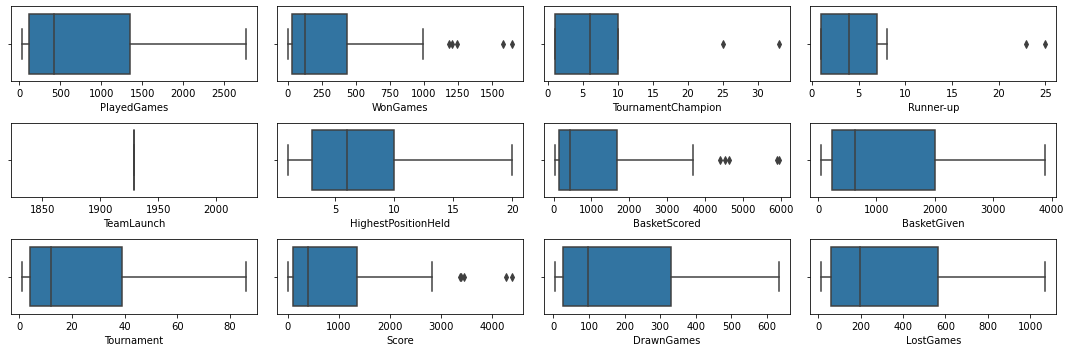

In [109]:
#box plots to understand that each column, check skewness and outliers
box_plot, ax = plt.subplots(3,4)

box_plot.set_figheight(5)
box_plot.set_figwidth(15)

sns.boxplot(x=data['PlayedGames'],ax=ax[0][0])
sns.boxplot(x=data['WonGames'],ax=ax[0][1])
sns.boxplot(x=data['TournamentChampion'],ax=ax[0][2])
sns.boxplot(x=data['Runner-up'],ax=ax[0][3])
sns.boxplot(x=data['TeamLaunch'],ax=ax[1][0])
sns.boxplot(x=data['HighestPositionHeld'],ax=ax[1][1])
sns.boxplot(x=data['BasketScored'],ax=ax[1][2])
sns.boxplot(x=data['BasketGiven'],ax=ax[1][3])
sns.boxplot(x=data['Tournament'],ax=ax[2][0])
sns.boxplot(x=data['Score'],ax=ax[2][1])
sns.boxplot(x=data['DrawnGames'],ax=ax[2][2])
sns.boxplot(x=data['LostGames'],ax=ax[2][3])

box_plot.tight_layout() 


# wongames,score and basketscored are outliers based on above figures

# Find out correlation among the columns in data set 

In [110]:
corr1 = data.corr()
corr1

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
Tournament,1.000000,0.981258,0.998683,0.971749,0.989295,0.949350,0.974867,0.987781,0.630689,0.650284,NaN,-0.708002
Score,0.981258,1.000000,0.979687,0.997232,0.958090,0.878780,0.996634,0.943801,0.872764,0.833611,NaN,-0.669215
PlayedGames,0.998683,0.979687,1.000000,0.967486,0.993972,0.955925,0.969970,0.990020,0.614738,0.636178,NaN,-0.711065
WonGames,0.971749,0.997232,0.967486,1.000000,0.939416,0.851436,0.999312,0.925745,0.882823,0.852441,NaN,-0.647819
DrawnGames,0.989295,0.958090,0.993972,0.939416,1.000000,0.972786,0.942234,0.992479,0.308734,0.474282,NaN,-0.720248
LostGames,0.949350,0.878780,0.955925,0.851436,0.972786,1.000000,0.857843,0.985041,-0.538801,-0.019934,NaN,-0.726172
BasketScored,0.974867,0.996634,0.969970,0.999312,0.942234,0.857843,1.000000,0.931079,0.862878,0.841565,NaN,-0.648672
BasketGiven,0.987781,0.943801,0.990020,0.925745,0.992479,0.985041,0.931079,1.000000,0.194981,0.406678,NaN,-0.727323
TournamentChampion,0.630689,0.872764,0.614738,0.882823,0.308734,-0.538801,0.862878,0.194981,1.000000,0.961435,NaN,NaN
Runner-up,0.650284,0.833611,0.636178,0.852441,0.474282,-0.019934,0.841565,0.406678,0.961435,1.000000,NaN,-0.569812


<AxesSubplot:>

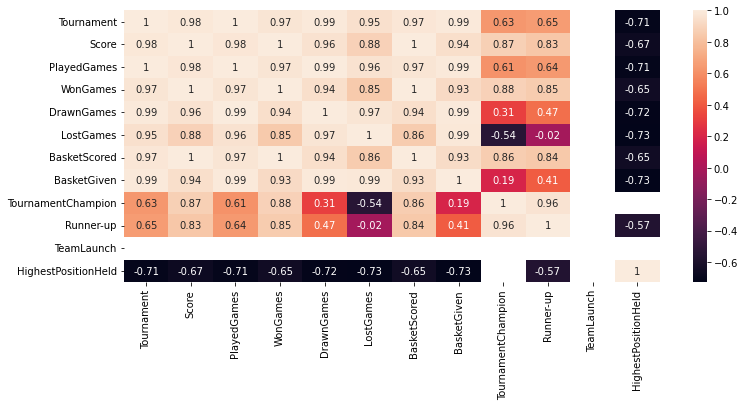

In [111]:
#Correlation Map
plt.figure(figsize=(12,5))
sns.heatmap(corr1,annot=True)

# Highly corralated data set as values are around or near to 1